### EDA Assignment on the Weather Dataset 

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [19]:
#load the data
weather = pd.read_csv('Weather Data.csv')
weather.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### Data Overview and Cleaning
What are the key characteristics of the dataset? (e.g., number of records, features, data types)
Identify and handle any missing or null values. Describe your approach and reasoning.
Check for and address any duplicate records.

In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


There are 8784 weather observations and 8 columns. Of the 8 columns, 2 are of object type while 6 of float/int type.

In [21]:
weather.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

Using the isna() method has shown that there are no missing values in the dataset. 

In [22]:
weather.duplicated().sum()

0

By using the duplicated() method, we have seen that there are no duplicate rows in my dataset

### Statistical Summary:
Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
Identify and describe any significant outliers in the data.

In [23]:
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


### Data Visualization:


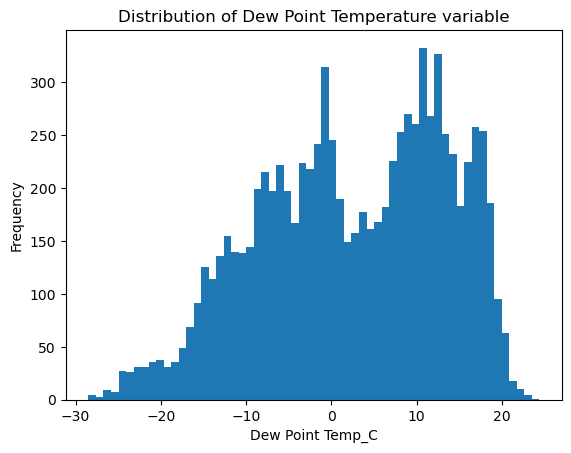

In [24]:
#distribution of temperature variable 
plt.hist(weather['Dew Point Temp_C'], bins=60)
plt.title('Distribution of Dew Point Temperature variable')
plt.xlabel('Dew Point Temp_C')
plt.ylabel('Frequency')
plt.show()

c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


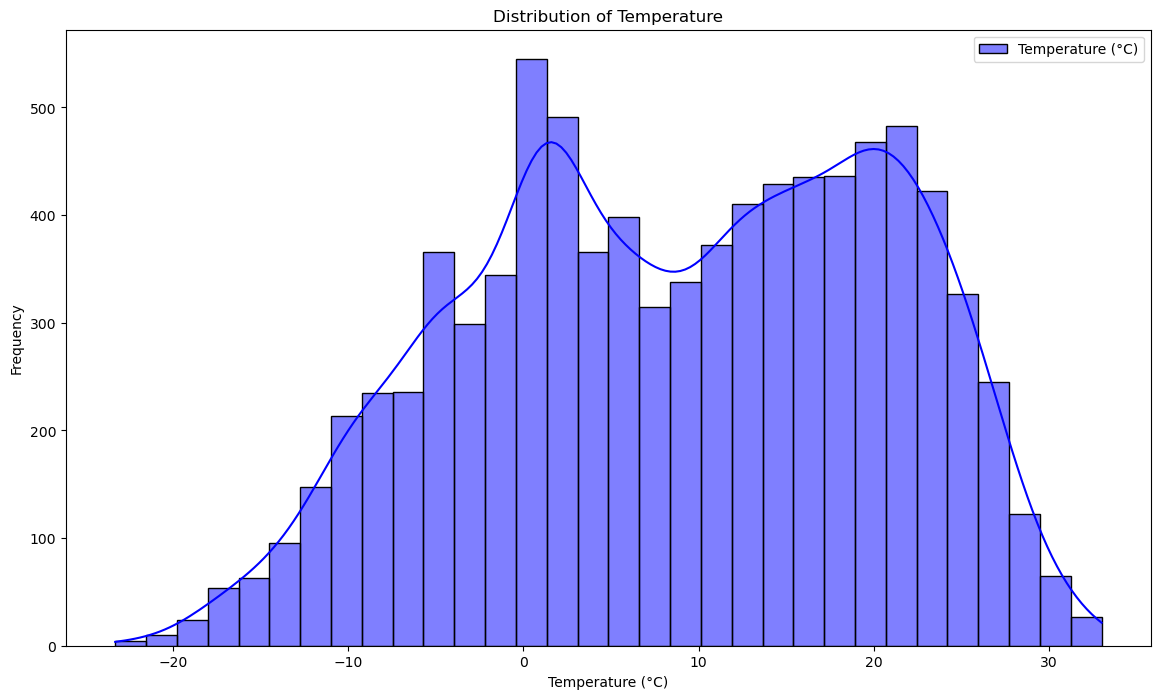

In [27]:

# Plotting distributions
plt.figure(figsize=(14, 8))
sns.histplot(weather['Temp_C'], kde=True, color='blue', label='Temperature (°C)')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


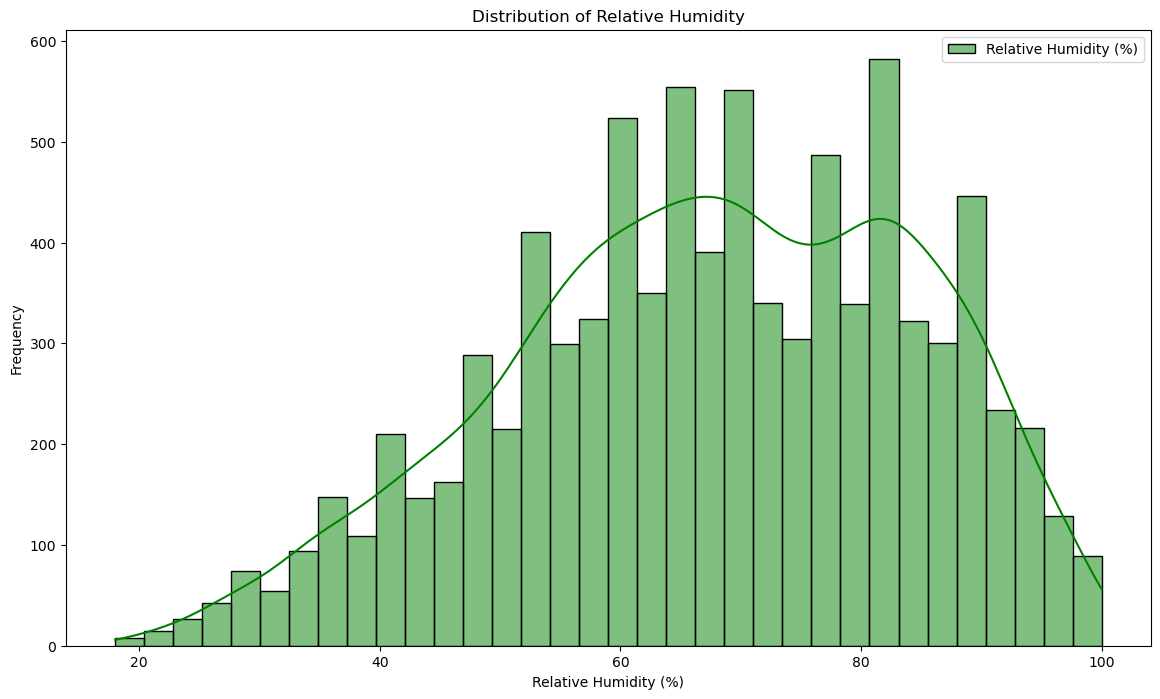

In [28]:

plt.figure(figsize=(14, 8))
sns.histplot(weather['Rel Hum_%'], kde=True, color='green', label='Relative Humidity (%)')
plt.title('Distribution of Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


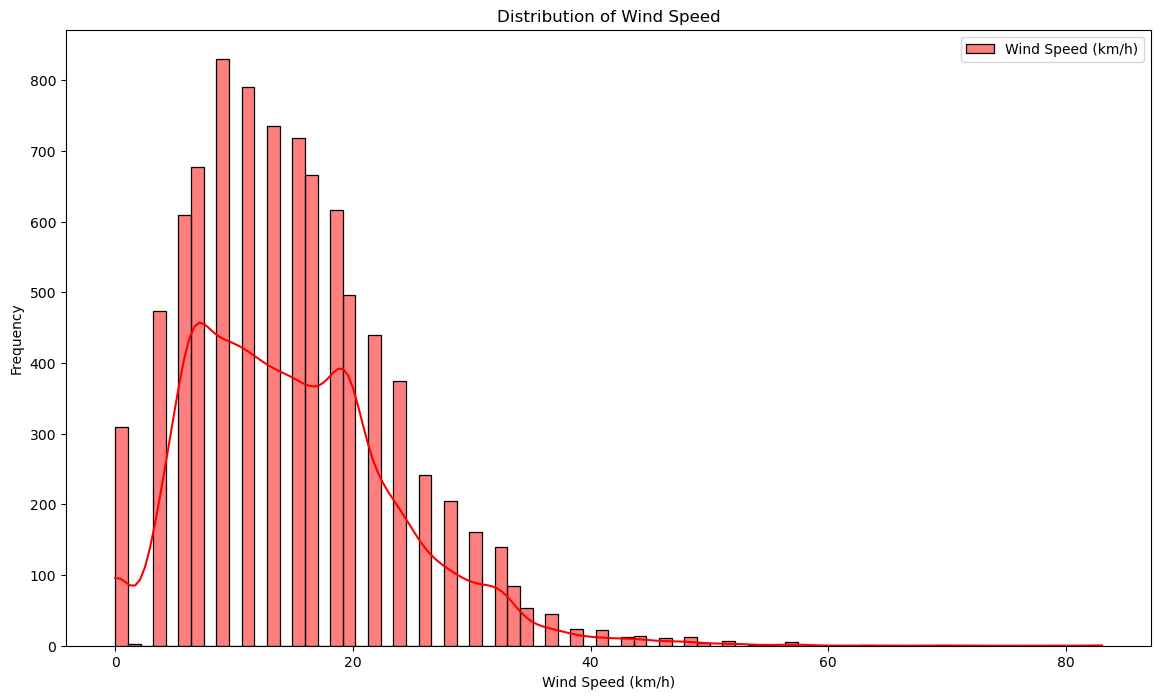

In [29]:

plt.figure(figsize=(14, 8))
sns.histplot(weather['Wind Speed_km/h'], kde=True, color='red', label='Wind Speed (km/h)')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Most of the observations for the wind speed variable range beteen 0 and 30km/hr. The highest recorded wind speed is 83 km/hr and it is far apart from the rest of the observations. 

In [31]:
from datetime import datetime 
# working on the Data/Time column to standardize it
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'], format='mixed')
weather['Month'] = weather['Date/Time'].dt.month

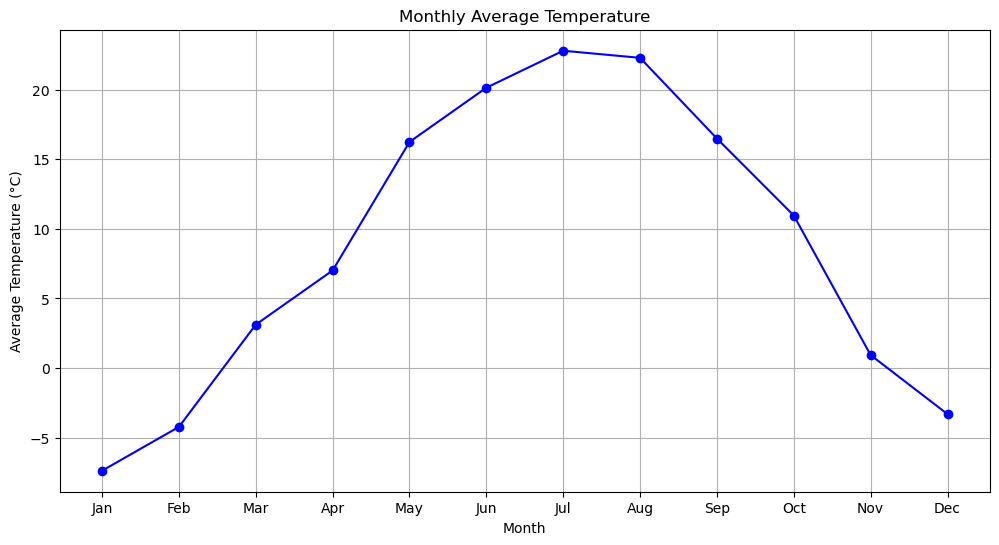

In [32]:
# Calculate the monthly average temperature
monthly_avg_temp = weather.groupby('Month')['Temp_C'].mean()

# Plotting the monthly average temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', linestyle='-', color='blue')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(monthly_avg_temp.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Average temperatures are high in the summer months (May, June, July, August, September) and lowest in Winter months (Nov, Dec, Jan, Feb)

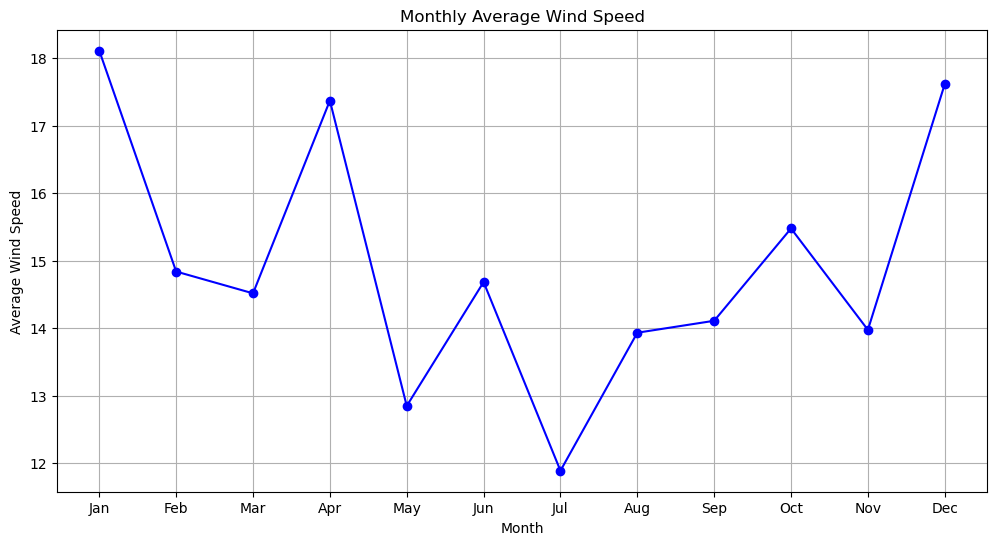

In [37]:
# Calculate the monthly average temperature
monthly_avg_wind = weather.groupby('Month')['Wind Speed_km/h'].mean()

# Plotting the monthly average temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_wind.index, monthly_avg_wind.values, marker='o', linestyle='-', color='blue')
plt.title('Monthly Average Wind Speed')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed')
plt.xticks(monthly_avg_temp.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The Wind Speed variable keeps changing witha high speed on January, April and December. The lowest speed is recorded in July which coincides with the time when temperature was at it's highest. 

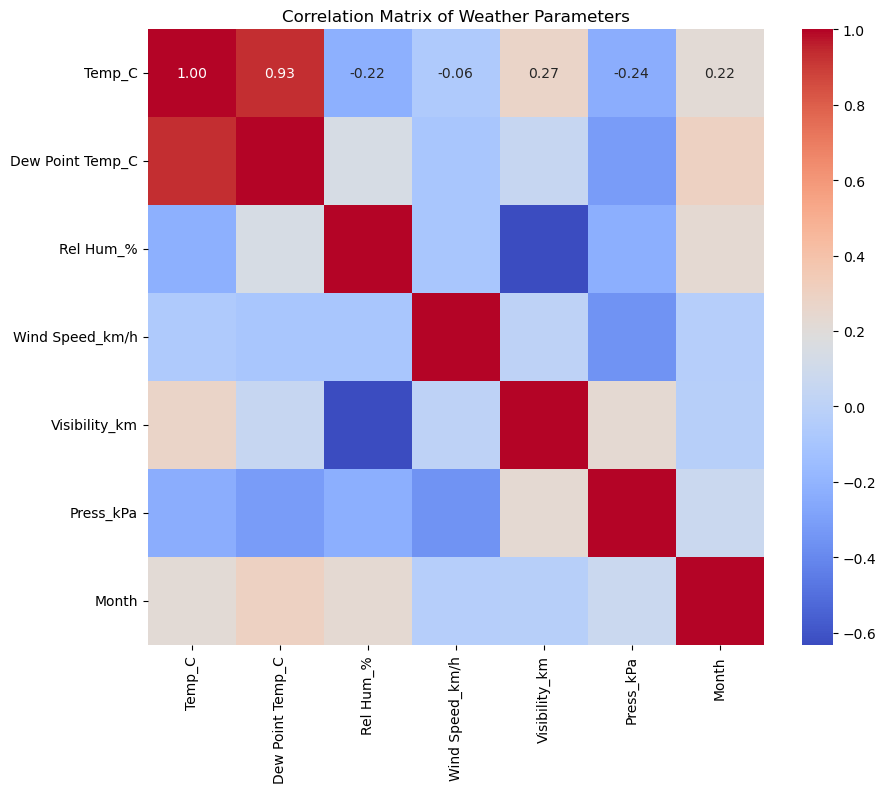

In [33]:
num_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Month']

# Compute the correlation matrix
corr_matrix = weather[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

There are a few observations from the correlation heatmap:
1. The first observation relates to the strong postiive correlation observed between some variables. Temp_C and Dew Point Temp_C have a strong positive correlation of 0.93 and this shows that an increase in temperature leads to an increase in Dew point temperature. 
Strong Positive Correlation:
2. The second observation is the moderate positive correlation between Temp_C and Rel Hum_% and this suggests that warmed temperatures can lead to higher relative humidity. 
3. The third observation is that there are variables that do not have any correlation or they have weak correlation. For instance, the variables; tempeture, wind speed, visibility, month and pressure seem to have weak correlation. 
4. The fourth observation is that there are variables with a strong negative correlation. Visibility and relative humidity have a strong negative correlation and this suggests that an when visibility is high, relative humidity is low. 

### Weather patterns and trends 

c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

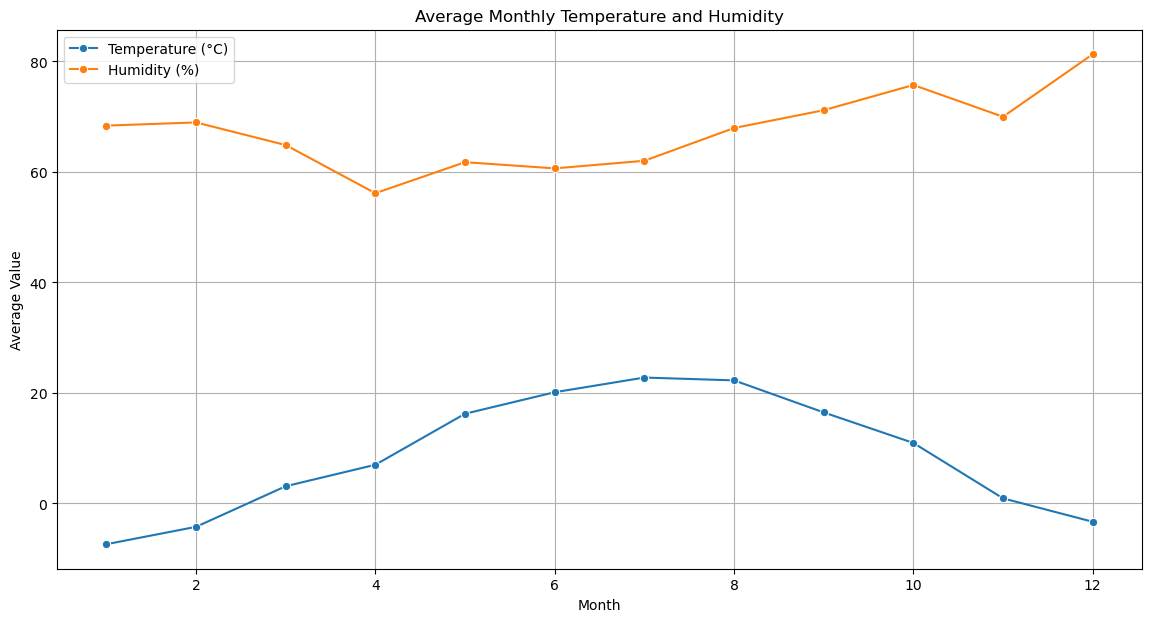

In [34]:
# Grouping by Month to calculate the average Temperature and Humidity
monthly_avg = weather.groupby('Month').agg({'Temp_C': 'mean', 'Rel Hum_%': 'mean'}).reset_index()

# Plotting Temperature and Humidity variation across months
plt.figure(figsize=(14, 7))

# Plot Temperature
sns.lineplot(x='Month', y='Temp_C', data=monthly_avg, marker='o', label='Temperature (°C)')
# Plot Humidity
sns.lineplot(x='Month', y='Rel Hum_%', data=monthly_avg, marker='o', label='Humidity (%)')

plt.title('Average Monthly Temperature and Humidity')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show();

The plot shows that both temperature and humidity follow a seasonal pattern. For temperature variable, we can see that it increases steadily from January with the peak being in July. Thereafter, the temperature decreases starts to decrease with December having lowest temperatures. This shows that the climate probably has warm summers and cold winters. 

On humidity, we can see that it keeps fluctuating. However, we can see that it peaks in July when temperature is highest and then decreases with December having the lowest humidity and this largely mirrors the trends seasonal trends shown by the temperature variable. 

We can see that humidity and temperature have a positive correlation as there is generally a positive correlation whereby higher temperatures are associated with higher humidity levels. 